In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

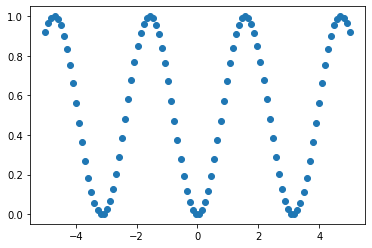

In [2]:
# pytorch only takes 2d x input so we use unsqueeze to insert a dimension of size one
x = torch.unsqueeze(torch.linspace(-5,5,100), dim=1)
y = (torch.sin(x))**2

# plot
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [3]:
class ThreeLayerNet(nn.Module):
    def __init__(self):
        super(ThreeLayerNet, self).__init__() 
        self.linear_1 = torch.nn.Linear(1, 10) 
        self.linear_2 = torch.nn.Linear(10, 10) 
        self.linear_3 = torch.nn.Linear(10, 1)
        
    
    def forward(self,x):
        x = F.relu(self.linear_1(x))
        x = F.relu(self.linear_2(x))
        x = self.linear_3(x)
        return x

net = ThreeLayerNet()
net

ThreeLayerNet(
  (linear_1): Linear(in_features=1, out_features=10, bias=True)
  (linear_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_3): Linear(in_features=10, out_features=1, bias=True)
)

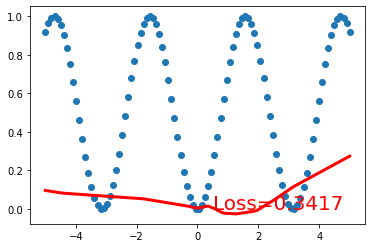

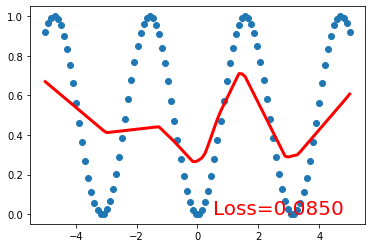

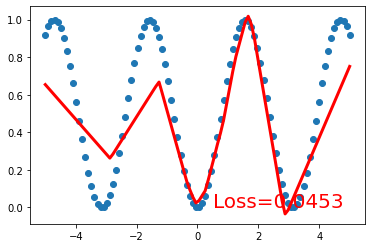

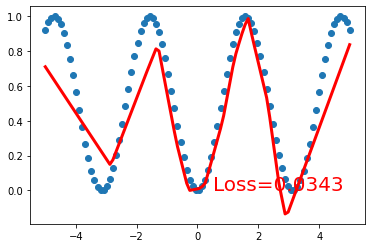

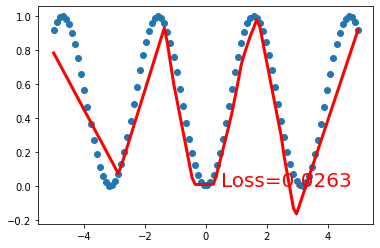

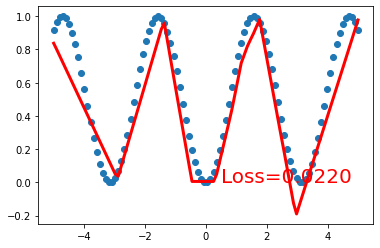

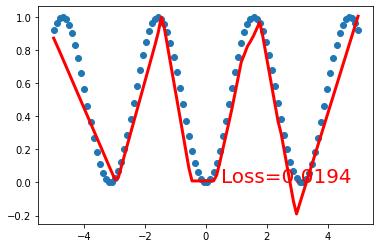

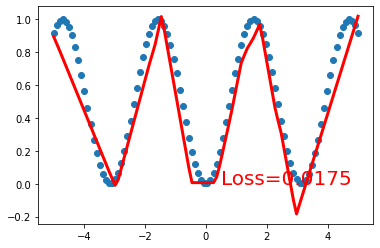

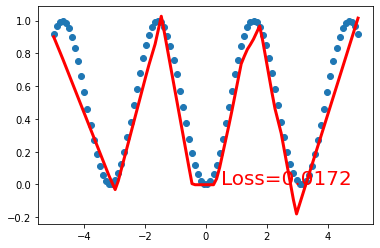

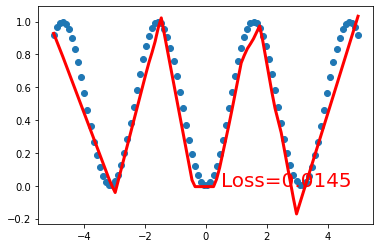

In [4]:
#optimizer
optimizer = torch.optim.SGD(net.parameters(),lr=0.2)

# loss
loss_func = torch.nn.MSELoss()

plt.ion()   
plt.show()
for t in range(2000):
    prediction = net(x)
    loss = loss_func(prediction,y)
    
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()
    
    if t % 200 == 0:
        # plot and show learning process
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=3)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)